In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'figure.figsize':(8,6)})

import warnings
warnings.filterwarnings('ignore')

In [2]:
df =  pd.read_csv('electricity_consumption.csv')
df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,1/1/2016,365,1423.5,219.0,247.73,31
1,2/1/2016,292,1138.8,175.2,234.11,31
2,3/1/2016,130,507.0,78.0,123.85,29
3,4/1/2016,117,456.3,70.2,111.22,29
4,5/1/2016,136,530.4,81.6,118.37,29


In [3]:
df['Bill_Date'] = pd.to_datetime(df['Bill_Date'],format='%m/%d/%Y')

In [4]:
df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29


In [5]:
df.index = df.Bill_Date
df = df.drop(['Bill_Date'],axis=1)

In [6]:
new_df = df.copy()
new_df = new_df[['Billed_amount']]

In [7]:
new_df.head()

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37


# 1. Simple Moving Average
1. simple MA = (t +(t-1)+(t-2)+...+(t-n))/n
2. here we take some windows size n and then we take average or mean of previous n values.

In [8]:
## simple moving average of windows 3
new_df['Simple_MA_Roll3'] = new_df['Billed_amount'].rolling(window=3).mean()
## then we shift the data because we need predication ,when we shift then it become predicted data for prev observation
new_df['Simple_MA_Roll3_Shift'] = new_df['Simple_MA_Roll3'].shift(1)

In [9]:
new_df.head()

,Billed_amount,Simple_MA_Roll3,Simple_MA_Roll3_Shift
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,201.896667,NaN
2016-04-01,111.22,156.393333,201.896667
2016-05-01,118.37,117.813333,156.393333


<AxesSubplot:xlabel='Bill_Date'>

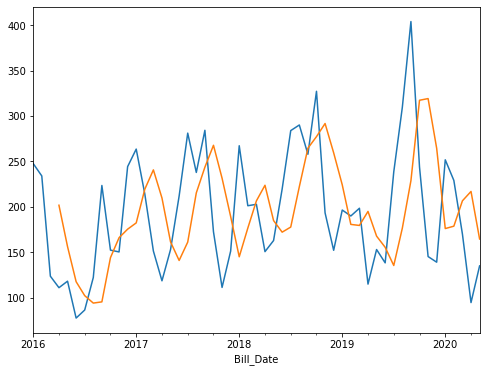

In [10]:
new_df['Billed_amount'].plot()
new_df['Simple_MA_Roll3_Shift'].plot()

# 2.  Weighted Moving Average
1. WMA = ( t*weight + ((t-1)*weight-1) + ((t-2)*weight-2) +...+ ((t-n)*weight-n) )/n
2. here we take some window with weight factor , if we give high or low weight factor . if we give high weight factor then it mean we are giving high priority for the most recent value and it we give it low number then it mean we giving high priority to old values.
3. weight factor is range between 0 to 1.
4. we do not have a specific function in pythonn for this so we create our own

In [11]:
def wma(weights):
    def calc(x):
        return (weights*x).mean()
    return calc

In [12]:
# weighted rolling of window 3
new_df['Weight_Roll3'] = new_df['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,1,1.5])))
# shifting for predication
new_df['Weight_Roll3_Shift'] = new_df['Weight_Roll3'].shift(1)

In [13]:
new_df.head()

,Billed_amount,Simple_MA_Roll3,Simple_MA_Roll3_Shift,Weight_Roll3,Weight_Roll3_Shift
Bill_Date,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,NaN,NaN
2016-03-01,123.85,201.896667,NaN,181.250000,NaN
2016-04-01,111.22,156.393333,201.896667,135.911667,181.250000
2016-05-01,118.37,117.813333,156.393333,116.900000,135.911667


<AxesSubplot:xlabel='Bill_Date'>

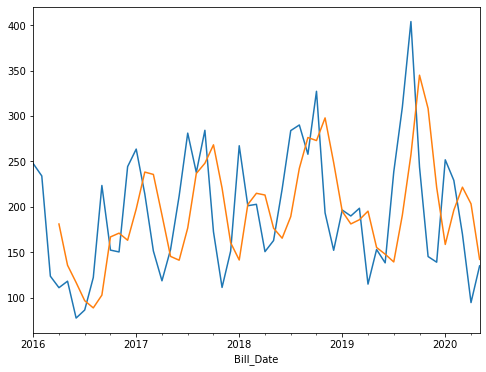

In [14]:
new_df['Billed_amount'].plot()
new_df['Weight_Roll3_Shift'].plot()

# 3. Exponential Moving Average
1. EMA = (close - previous EMA) + (2/(span+1) + previous EMA
2. it is similar to the weighted average but we do not assign weight here.
3. it takes the previous time period then calculate the EMA and then take the EMA as next input rather then time t-1 , t-2.
4. it adopt more fast data point change rather then simple moving average and it also maintain weight internally.
5. here span is duration like window.

In [15]:
# EMA rolling of span 3
new_df['EMA_Span3'] = new_df['Billed_amount'].ewm(span=3 , adjust=False , min_periods=0).mean()
# shifting for predication
new_df['EMA_Span3_Shift'] = new_df['EMA_Span3'].shift(1)

In [16]:
new_df.head()

,Billed_amount,Simple_MA_Roll3,Simple_MA_Roll3_Shift,Weight_Roll3,Weight_Roll3_Shift,EMA_Span3,EMA_Span3_Shift
Bill_Date,,,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN,247.73000,NaN
2016-02-01,234.11,NaN,NaN,NaN,NaN,240.92000,247.7300
2016-03-01,123.85,201.896667,NaN,181.250000,NaN,182.38500,240.9200
2016-04-01,111.22,156.393333,201.896667,135.911667,181.250000,146.80250,182.3850
2016-05-01,118.37,117.813333,156.393333,116.900000,135.911667,132.58625,146.8025


<AxesSubplot:xlabel='Bill_Date'>

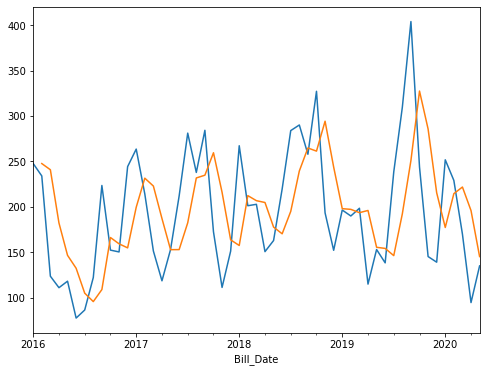

In [17]:
new_df['Billed_amount'].plot()
new_df['EMA_Span3_Shift'].plot()

# 4. Exponential Smoothing Average
1. t+1 = @[t + (1-@)t-1 + ((1-@)^2)t-2 + ((1-@)^3)t-3 + ...]
2. here we do not have to pass span , here we pass a smoothing parameter called alpha.
3. the alpha is value in range 0 to 1 , the large value of alpha means model paying attention to most recent values and low value of alpha means it taking history in count.

In [18]:
# EMA rolling of span 3
new_df['ESA_alpha'] = new_df['Billed_amount'].ewm(alpha=0.8 , adjust=False , min_periods=0).mean()
# shifting for predication
new_df['ESA_alpha_Shift'] = new_df['ESA_alpha'].shift(1)

In [19]:
new_df.head()

,Billed_amount,Simple_MA_Roll3,Simple_MA_Roll3_Shift,Weight_Roll3,Weight_Roll3_Shift,EMA_Span3,EMA_Span3_Shift,ESA_alpha,ESA_alpha_Shift
Bill_Date,,,,,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN,247.73000,NaN,247.730000,NaN
2016-02-01,234.11,NaN,NaN,NaN,NaN,240.92000,247.7300,236.834000,247.73000
2016-03-01,123.85,201.896667,NaN,181.250000,NaN,182.38500,240.9200,146.446800,236.83400
2016-04-01,111.22,156.393333,201.896667,135.911667,181.250000,146.80250,182.3850,118.265360,146.44680
2016-05-01,118.37,117.813333,156.393333,116.900000,135.911667,132.58625,146.8025,118.349072,118.26536


<AxesSubplot:xlabel='Bill_Date'>

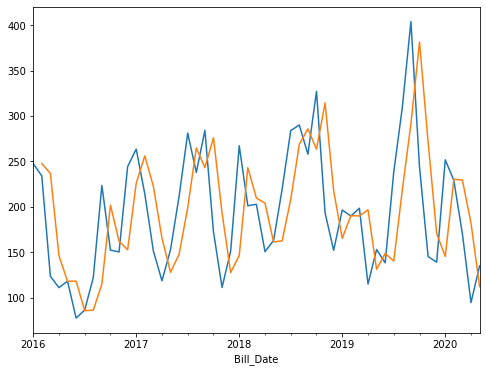

In [20]:
new_df['Billed_amount'].plot()
new_df['ESA_alpha_Shift'].plot()

In [21]:
sma_rmse = mean_squared_error(new_df['Billed_amount'][3:],new_df['Simple_MA_Roll3_Shift'][3:])**0.5
print(f'Simple Moving Average: :{sma_rmse}')
wma_rmse = mean_squared_error(new_df['Billed_amount'][3:],new_df['Weight_Roll3_Shift'][3:])**0.5
print(f'Weighted Moving Average: :{wma_rmse}')
ema_rmse = mean_squared_error(new_df['Billed_amount'][1:],new_df['EMA_Span3_Shift'][1:])**0.5
print(f'Exponential Moving Average: :{ema_rmse}')
esa_rmse = mean_squared_error(new_df['Billed_amount'][1:],new_df['ESA_alpha_Shift'][1:])**0.5
print(f'Exponential Moving Average: :{esa_rmse}')

Simple Moving Average: :78.72717946455623
Weighted Moving Average: :72.49258925611332
Exponential Moving Average: :69.12882156094688
Exponential Moving Average: :66.76651557883517


<AxesSubplot:xlabel='Bill_Date'>

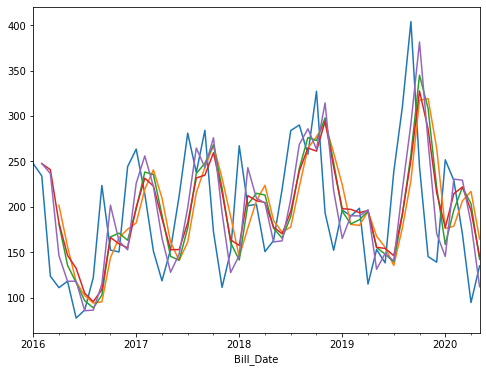

In [22]:
new_df['Billed_amount'].plot()
new_df['Simple_MA_Roll3_Shift'].plot()
new_df['Weight_Roll3_Shift'].plot()
new_df['EMA_Span3_Shift'].plot()
new_df['ESA_alpha_Shift'].plot()